Epoch 1/10
375/375 [==============================] - 7s 14ms/step - loss: 0.4496 - accuracy: 0.8386 - val_loss: 0.3658 - val_accuracy: 0.8683
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.3248 - accuracy: 0.8811 - val_loss: 0.3520 - val_accuracy: 0.8726
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2840 - accuracy: 0.8953 - val_loss: 0.3267 - val_accuracy: 0.8842
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2567 - accuracy: 0.9048 - val_loss: 0.3248 - val_accuracy: 0.8859
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2342 - accuracy: 0.9124 - val_loss: 0.3256 - val_accuracy: 0.8864
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2114 - accuracy: 0.9210 - val_loss: 0.3342 - val_accuracy: 0.8854
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1946 - accuracy: 0.9266 - val_loss: 0.3226 - val_accuracy: 0.8902

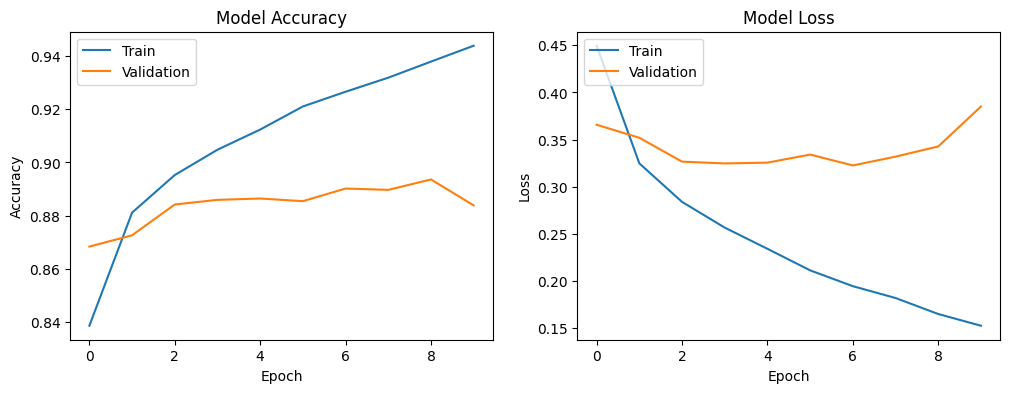

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.77      0.80      1000
           3       0.93      0.83      0.88      1000
           4       0.74      0.88      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.67      0.72      0.70      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



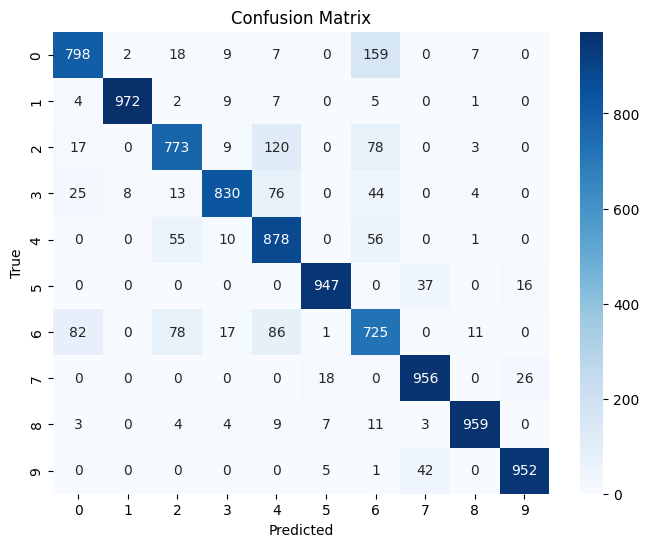

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
val_images = scaler.transform(val_images)
test_images = scaler.transform(test_images)

# Define and train the DBN model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Plot the training history
plot_history(history)

# Predictions
predictions_prob = model.predict(test_images)
predictions = [tf.argmax(prob).numpy() for prob in predictions_prob]
true_labels = [tf.argmax(label).numpy() for label in test_labels]


# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
